In [19]:
#Install the dependencies
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

In [20]:
# load the dataset
raw = pd.read_csv('C:/Users/User/Downloads/bbri.csv', sep=',', header=0, index_col=0, engine='python', usecols=[0, 4], parse_dates=True)
dataframe = pd.read_csv('C:/Users/User/Downloads/bbri.csv', sep=',', usecols=[4], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float')
print(raw)

             Close
Date              
2020-01-20  4660.0
2020-01-21  4670.0
2020-01-22  4710.0
2020-01-23  4740.0
2020-01-24  4740.0
...            ...
2020-11-09  3690.0
2020-11-10  4000.0
2020-11-11  4120.0
2020-11-12  3950.0
2020-11-13  4000.0

[200 rows x 1 columns]


In [3]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target ) shifted 'n' units up
raw['Prediction'] = raw[['Close']].shift(-forecast_out)
#print the new data set
print(raw.tail())

             Close  Prediction
Date                          
2020-11-09  3690.0         NaN
2020-11-10  4000.0         NaN
2020-11-11  4120.0         NaN
2020-11-12  3950.0         NaN
2020-11-13  4000.0         NaN


In [4]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(raw.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

[[4660.]
 [4670.]
 [4710.]
 [4740.]
 [4740.]
 [4650.]
 [4620.]
 [4620.]
 [4580.]
 [4460.]
 [4460.]
 [4560.]
 [4560.]
 [4550.]
 [4550.]
 [4500.]
 [4510.]
 [4530.]
 [4570.]
 [4550.]
 [4470.]
 [4400.]
 [4480.]
 [4560.]
 [4510.]
 [4490.]
 [4500.]
 [4480.]
 [4130.]
 [4190.]
 [3980.]
 [4100.]
 [4220.]
 [4150.]
 [4010.]
 [3750.]
 [3910.]
 [3910.]
 [3610.]
 [3720.]
 [3500.]
 [3260.]
 [3140.]
 [2930.]
 [2810.]
 [2620.]
 [2440.]
 [2940.]
 [3230.]
 [3010.]
 [3020.]
 [2930.]
 [2870.]
 [2890.]
 [3020.]
 [3030.]
 [2820.]
 [2790.]
 [2770.]
 [2900.]
 [2760.]
 [2610.]
 [2830.]
 [2780.]
 [2720.]
 [2790.]
 [2800.]
 [2630.]
 [2660.]
 [2590.]
 [2580.]
 [2730.]
 [2630.]
 [2630.]
 [2620.]
 [2590.]
 [2620.]
 [2490.]
 [2470.]
 [2350.]
 [2240.]
 [2170.]
 [2370.]
 [2480.]
 [2520.]
 [2630.]
 [2730.]
 [2950.]
 [3180.]
 [3100.]
 [3060.]
 [3110.]
 [3300.]
 [3210.]
 [3030.]
 [2970.]
 [3030.]
 [2900.]
 [3130.]
 [3100.]
 [3050.]
 [3100.]
 [3060.]
 [3010.]
 [3120.]
 [3060.]
 [3030.]
 [3040.]
 [3030.]
 [3060.]
 [3060.]
 

In [5]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(raw['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

[3980. 4100. 4220. 4150. 4010. 3750. 3910. 3910. 3610. 3720. 3500. 3260.
 3140. 2930. 2810. 2620. 2440. 2940. 3230. 3010. 3020. 2930. 2870. 2890.
 3020. 3030. 2820. 2790. 2770. 2900. 2760. 2610. 2830. 2780. 2720. 2790.
 2800. 2630. 2660. 2590. 2580. 2730. 2630. 2630. 2620. 2590. 2620. 2490.
 2470. 2350. 2240. 2170. 2370. 2480. 2520. 2630. 2730. 2950. 3180. 3100.
 3060. 3110. 3300. 3210. 3030. 2970. 3030. 2900. 3130. 3100. 3050. 3100.
 3060. 3010. 3120. 3060. 3030. 3040. 3030. 3060. 3060. 3050. 3040. 3030.
 3190. 3140. 3110. 3160. 3170. 3130. 3140. 3100. 3050. 3150. 3100. 3140.
 3090. 3150. 3140. 3120. 3160. 2990. 3080. 3080. 3110. 3110. 3130. 3190.
 3350. 3330. 3340. 3520. 3560. 3640. 3800. 3740. 3700. 3690. 3510. 3610.
 3660. 3580. 3550. 3510. 3520. 3410. 3180. 3250. 3440. 3330. 3260. 3200.
 3220. 3190. 3130. 3080. 3030. 3160. 3090. 3040. 3040. 3160. 3100. 3160.
 3190. 3120. 3150. 3150. 3190. 3280. 3360. 3310. 3250. 3280. 3250. 3240.
 3300. 3290. 3340. 3360. 3380. 3380. 3290. 3490. 35

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [8]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.10759494408196035


In [11]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(raw.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[3040.]
 [3160.]
 [3100.]
 [3160.]
 [3190.]
 [3120.]
 [3150.]
 [3150.]
 [3190.]
 [3280.]
 [3360.]
 [3310.]
 [3250.]
 [3280.]
 [3250.]
 [3240.]
 [3300.]
 [3290.]
 [3340.]
 [3360.]
 [3380.]
 [3380.]
 [3290.]
 [3490.]
 [3560.]
 [3690.]
 [4000.]
 [4120.]
 [3950.]
 [4000.]]


In [12]:
# Print support vector regressor model predictions for the next '30' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[3114.42385622 3127.16682847 3120.79534235 3127.16682847 3130.35257154
 3122.91917105 3126.10491412 3126.10491412 3130.35257154 3139.90980073
 3148.40511557 3143.0955438  3136.72405767 3139.90980073 3136.72405767
 3135.66214331 3142.03362944 3140.97171509 3146.28128686 3148.40511557
 3150.52894428 3150.52894428 3140.97171509 3162.21000218 3169.64340267
 3183.44828928 3216.36763428 3229.11060654 3211.05806251 3216.36763428]
[3559.89979677 3690.09983472 3139.05282097 3690.09983472 3160.10017714
 3139.01600709 3509.8998581  3509.8998581  3160.10017714 3139.01642098
 3139.01420038 3139.01642098 3289.90050265 3139.01642098 3289.90050265
 3138.99290203 3139.01642098 3139.01642098 3040.09979393 3139.01420038
 3139.01642098 3139.01642098 3139.01642098 3138.99104614 3100.10037241
 3139.01691509 3139.01642098 3138.9996722  3139.01642098 3139.01642098]


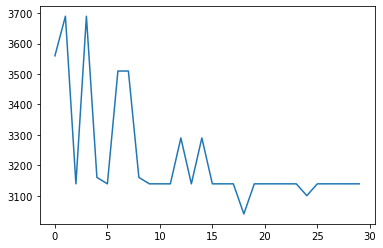

In [15]:
# menampilkan grafik
plt.plot(svm_prediction)